# Multinomial Regression with Multiple Variable


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper parameters
learning_rate = 1
training_epochs = 1000
display_step = 50

## Dataset

Our dataset a wire resistance table from a chip for 20nm process node. 
It is a 2D array of wire-length, wire-width, temperature and wire-resistance.
We'll use wire length and wire resistance as our dataset for linear regression example.


|Wire-length | Wire-width  | Temperature | Resistance
|------------|-------------|-------------|-------------
|(meters)    | (meters)    | (degree C)  | (Ohm)
|3.806e-06   | 1.088e-07   | 79.0494     | 52.897 
|4.307e-06   | 7.517e-08   | 56.2845     | 83.904 
|4.158e-06   | 1.135e-07   | 27.0643     | 52.517 
|5.416e-06   | 8.939e-08   | 42.0784     | 85.435 
|6.274e-06   | 9.090e-08   | 55.5829     | 110.85 
|8.215e-06   | 1.199e-07   | 97.4032     | 119.45
|6.437e-06   | 6.653e-08   | 75.0783     | 148.11 
|2.823e-06   | 1.028e-07   | 2.48765     | 36.138 
|2.015e-06   | 1.293e-07   | 63.5732     | 22.955 
|6.346e-06   | 6.420e-08   | 77.0031     | 145.52 
|5.008e-06   | 1.047e-07   | 105.656     | 79.024 



In [3]:
#Load dataset
datafile = os.path.join('..','data','res.tbl.gz')
dataset = np.loadtxt(datafile, dtype=np.float32, ndmin=2)
# reduce the dataset for quick experiments
#dataset = dataset[0:300,:]

## Normalization
Since our length values are very small (in microns) and resistance values range from tens to hundreds, it is **very important** normalize the dataset right after loading.

In [4]:
# normalize the dataset between 0 and 1.
data_min = np.min(dataset, axis=0)
data_max = np.max(dataset, axis=0)

def normalize(d, min, max):
    return (d-min)/(max-min)

def denormalize(d, min, max):
    return ((max-min)*d) + min

dataset = normalize(dataset, data_min, data_max)
np.random.shuffle(dataset)

## Divide the dataset
into training dataset and validation dataset

In [5]:
# training dataset percentage is 80%
def divide_dataset(dataset):
    train_pct = 0.8; 
    # divide dataset into training and validation set
    train_index = int(dataset.shape[0]*train_pct)
    t_X = dataset[:train_index,0:3]
    t_Y = dataset[:train_index,3]
    v_X = dataset[train_index:,0:3]
    v_Y = dataset[train_index:,3]
    
    return t_X, t_Y, v_X, v_Y

train_X, train_Y, valid_X, valid_Y = divide_dataset(dataset)
n_samples = train_X.shape[0]

## Declare Graph Variables

Place to declare plave holders and variables for compute graph

In [7]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
# tf Graph Input
X1 = tf.placeholder("float")
X2 = tf.placeholder("float")
X3 = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W1  = tf.Variable(0.405, name="weight1")
W21 = tf.Variable(-0.466, name="weight21")
W22 = tf.Variable(-0.015, name="weight22")
W3  = tf.Variable(0.189, name="weight3")
b   = tf.Variable(0.16, name="bias")


Instructions for updating:
non-resource variables are not supported in the long term


## Compute Graph
Construct a multivariate polynomial model

In [8]:
predicted = W1*X1 + W21*X2 + W22*X2*X2 + W3*X3 + b

## Cost function and Optimizer

In [9]:
# Mean squared error
cost = tf.reduce_sum((predicted-Y)*(predicted-Y))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Train the Model

In [10]:
# Prepare data
tX1 = train_X[:,0]
tX2 = train_X[:,1]
tX3 = train_X[:,2]
vX1 = valid_X[:,0]
vX2 = valid_X[:,1]
vX3 = valid_X[:,2]

In [11]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W1=", sess.run(W1), "W21=", sess.run(W21), "W22=", sess.run(W22), "W3=", sess.run(W3),"b=", sess.run(b))

    print( "Optimization Finished!" )

    # Find cost on training and validation dataset.
    training_cost = sess.run(cost, feed_dict={X1:tX1, X2:tX2, X3:tX3, Y:train_Y})
    print ("Training   cost (mean sq. error) =",training_cost, "W1=", sess.run(W1), "W21=", sess.run(W21), "W22=", sess.run(W22), "W3=", sess.run(W3), "b=", sess.run(b))
    validation_cost = sess.run(cost, feed_dict={X1:vX1, X2:vX2, X3:vX3, Y:valid_Y})
    print ("Validation cost (mean sq. error) =",validation_cost, '\n')
    
    # Record the mode before closing the session
    Weight1  = sess.run(W1)
    Weight21 = sess.run(W21)
    Weight22 = sess.run(W22)
    Weight3  = sess.run(W3)
    Bias   = sess.run(b)

Epoch: 0050 cost= 0.000243369 W1= 0.3163588 W21= -0.411969 W22= 0.06399716 W3= 0.108548954 b= 0.120781176
Epoch: 0100 cost= 0.000201116 W1= 0.2909818 W21= -0.40075135 W22= 0.08643097 W3= 0.085435405 b= 0.1319312
Epoch: 0150 cost= 0.000192972 W1= 0.2799898 W21= -0.4036678 W22= 0.09465155 W3= 0.07506229 b= 0.14134061
Epoch: 0200 cost= 0.000189582 W1= 0.27459678 W21= -0.40959522 W22= 0.100347914 W3= 0.06978858 b= 0.1478869
Epoch: 0250 cost= 0.000187402 W1= 0.2717546 W21= -0.4160464 W22= 0.10586526 W3= 0.066929705 b= 0.1523789
Epoch: 0300 cost= 0.000185614 W1= 0.27020058 W21= -0.42249534 W22= 0.11154391 W3= 0.0653346 b= 0.1556054
Epoch: 0350 cost= 0.000183978 W1= 0.26933384 W21= -0.42884836 W22= 0.11734904 W3= 0.06443298 b= 0.15808779
Epoch: 0400 cost= 0.000182415 W1= 0.2688439 W21= -0.4351001 W22= 0.12320886 W3= 0.063919395 b= 0.16013758
Epoch: 0450 cost= 0.000180901 W1= 0.26856327 W21= -0.4412587 W22= 0.1290712 W3= 0.06362448 b= 0.1619345
Epoch: 0500 cost= 0.000179428 W1= 0.2683997 W21= 

# Denormalize


In [12]:
# Formulate your trained model as a matrix before denormalization
def PolyModel(x1, x2, x3):
    return Weight1*x1 + Weight21*x2 + Weight22*x2*x2 + Weight3*x3 + Bias

fX = PolyModel(tX1, tX2, tX3)

# Formulate your trained model as a matrix
trained_model = denormalize(fX, data_min[3], data_max[3])

# De normalize dataset
train_X, train_Y, valid_X, valid_Y = divide_dataset(denormalize(dataset, data_min, data_max))

# separate variables for graphical display
tX1 = train_X[:,0]
tX2 = train_X[:,1]
tX3 = train_X[:,2]
vX1 = valid_X[:,0]
vX2 = valid_X[:,1]
vX3 = valid_X[:,2]

# Plot Model with Dataset

C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_14776/1745037438.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(tX1*1e6, train_Y, 'ro', label='Training data', marker='o', markersize=1)
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_14776/1745037438.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(vX1*1e6, valid_Y, 'bo', label='Validation data', marker='D', markersize=1)


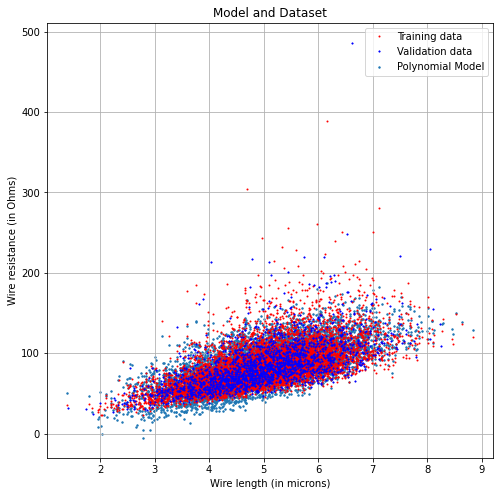

In [13]:
#Graphic display
plt.figure(figsize=(8,8))
plt.title('Model and Dataset')
plt.xlabel('Wire length (in microns)')
plt.ylabel('Wire resistance (in Ohms)')
plt.grid()
plt.plot(tX1*1e6, train_Y, 'ro', label='Training data', marker='o', markersize=1)
plt.plot(vX1*1e6, valid_Y, 'bo', label='Validation data', marker='D', markersize=1)
plt.scatter(train_X[:,0]*1e6, trained_model, label='Polynomial Model', s=2)
plt.legend()
plt.show()

# Predict Resistance Values 

In [14]:
def predictResistance(length, width, temperature):
    l = normalize(length,      data_min[0], data_max[0])
    w = normalize(width,       data_min[1], data_max[1])
    t = normalize(temperature, data_min[2], data_max[2])
    poly_model = Weight1*l + Weight21*w + Weight22*w*w + Weight3*t + Bias
    return denormalize(poly_model,data_min[3], data_max[3])

# convert values shows in the table at the top into quads.
res_tbl = [ [3.806e-06, 1.088e-07, 79.0494, 52.897],
            [4.307e-06, 7.517e-08, 56.2845, 83.904],
            [4.158e-06, 1.135e-07, 27.0643, 52.517],
            [5.416e-06, 8.939e-08, 42.0784, 85.435],
            [6.274e-06, 9.090e-08, 55.5829, 110.85],
            [8.215e-06, 1.199e-07, 97.4032, 119.45],
            [6.437e-06, 6.653e-08, 75.0783, 148.11],
            [2.823e-06, 1.028e-07, 2.48765, 36.138],
            [2.015e-06, 1.293e-07, 63.5732, 22.955],
            [6.346e-06, 6.420e-08, 77.0031, 145.52],
            [5.008e-06, 1.047e-07, 105.656, 79.024] ]

for quad in res_tbl:
    predicted_resistance = predictResistance(quad[0], quad[1], quad[2])
    print( "Wire length = ", quad[0], ", Predicted Resistance = ", 
          predicted_resistance, ", Actual Resistance =", quad[3],
         ". Diff=", quad[3]-predicted_resistance)

Wire length =  3.806e-06 , Predicted Resistance =  64.00523943487708 , Actual Resistance = 52.897 . Diff= -11.108239434877085
Wire length =  4.307e-06 , Predicted Resistance =  98.10597282796729 , Actual Resistance = 83.904 . Diff= -14.201972827967296
Wire length =  4.158e-06 , Predicted Resistance =  50.093647187626374 , Actual Resistance = 52.517 . Diff= 2.423352812373629
Wire length =  5.416e-06 , Predicted Resistance =  97.51422390711289 , Actual Resistance = 85.435 . Diff= -12.07922390711289
Wire length =  6.274e-06 , Predicted Resistance =  114.48906850830681 , Actual Resistance = 110.85 . Diff= -3.6390685083068206
Wire length =  8.215e-06 , Predicted Resistance =  134.266799404234 , Actual Resistance = 119.45 . Diff= -14.816799404234004
Wire length =  6.437e-06 , Predicted Resistance =  149.12683333246662 , Actual Resistance = 148.11 . Diff= -1.0168333324666037
Wire length =  2.823e-06 , Predicted Resistance =  29.454022512987752 , Actual Resistance = 36.138 . Diff= 6.6839774870

# Error Distribution

In [15]:
def sampleError(sampleData, goldData):
    sampleData = predictResistance(sampleData[:,0], sampleData[:,1], sampleData[:,2])
    error = (goldData-sampleData)/goldData
    return error

training_Error   = sampleError(train_X, train_Y)
validation_Error = sampleError(valid_X, valid_Y)

print('Training   error mean=', np.mean(training_Error),   ' and distribution=', np.std(training_Error))
print('Validation error mean=', np.mean(validation_Error), ' and distribution=', np.std(validation_Error))

Training   error mean= -0.0020555728  and distribution= 0.096243784
Validation error mean= -0.0023021798  and distribution= 0.10207586


# Plot Error

C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_14776/61183753.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(train_X[:,0]*1e6, 100*training_Error, 'ro', label='Training Error', marker='o', markersize=1)
C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_14776/61183753.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(valid_X[:,0]*1e6, 100*validation_Error, 'bo', label='Validation Error', marker='D', markersize=1)


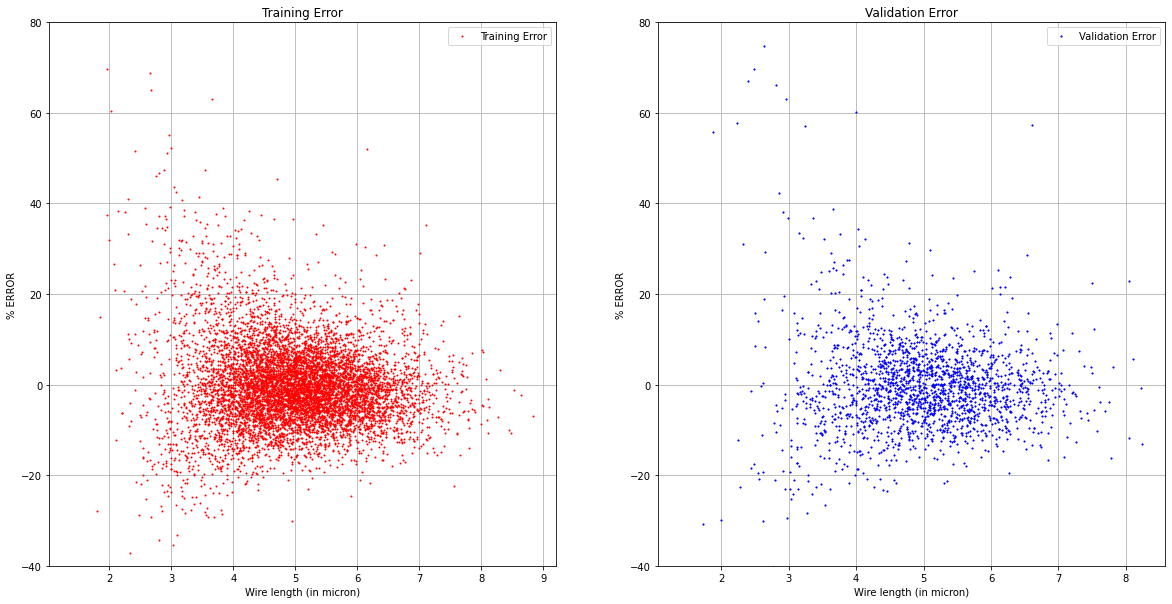

In [16]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.grid()
plt.plot(train_X[:,0]*1e6, 100*training_Error, 'ro', label='Training Error', marker='o', markersize=1)
plt.title('Training Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.ylim(-40, 80)
plt.legend()


plt.subplot(1, 2, 2)
plt.grid()
plt.plot(valid_X[:,0]*1e6, 100*validation_Error, 'bo', label='Validation Error', marker='D', markersize=1)
plt.title('Validation Error')
plt.xlabel('Wire length (in micron)')
plt.ylabel('% ERROR')
plt.ylim(-40, 80)
plt.legend()

plt.show()

# 4D Scatter Plots
Plot 4D scatter plots for training and validation with polnomial model as a surface. 
Surface predicts the points for data. All the data points are supposed to be on the
model surface for a perfect model.
Color of the points represents 4th dimension. 


C:\Users\DEVELO~1\AppData\Local\Temp/ipykernel_14776/3808055258.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


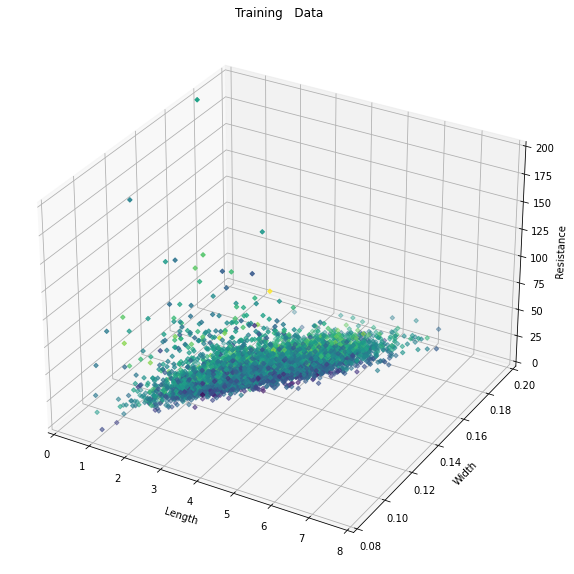

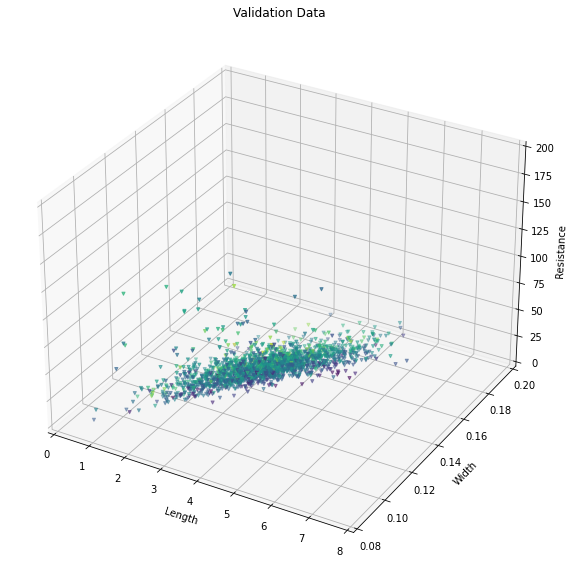

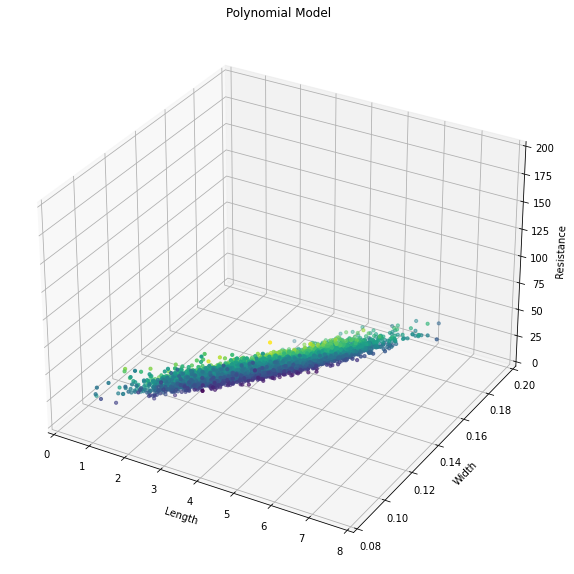

In [48]:
# 4D plot. Here temperate is represented as color temperature in 
# the 3D plot of length/width as x/y axis and resistance as Z axis.

from mpl_toolkits.mplot3d import Axes3D

def fourDPlot(t, X, Y, Z, c, m):
    fig = plt.figure(figsize=(10,10))

    ax = fig.gca(projection='3d')

    ax.scatter(X, Y, Z, c=c, marker=m, s=10)

    ax.set_title(t)
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_zlabel('Resistance')
    ax.set_xlim(0, 8)
    ax.set_ylim(8e-2, 2e-1)
    ax.set_zlim(0, 200)
    
    # Draw poly model on top of data.
    length_range = np.arange(1,10,0.05)
    width_range  = np.arange(0.02, 0.2, 0.001)
    hei_range  = np.arange(0.02, 0.2, 0.001)
    lgrid, wgrid = np.meshgrid(length_range, width_range)
    sorted_model = np.zeros(length_range.shape)
    temperature = normalize(63.5, data_min[2], data_max[2])
    i=0
    for x1, x2 in zip(length_range, width_range):
        model_value = PolyModel(normalize(x1*1e-6, data_min[0], data_max[0]), 
                                normalize(x2*1e-6, data_min[1], data_max[1]), 
                                temperature)
        sorted_model[i] = denormalize(model_value, data_min[3], data_max[3])
        i=i+1

#     surf = ax.plot_surface(lgrid, wgrid, wgrid,sorted_model, rstride=1, cstride=1, alpha=0.4)

    plt.show()
    
fourDPlot('Training   Data', tX1*1e6, tX2*1e6, train_Y,        tX3, 'D')
fourDPlot('Validation Data', vX1*1e6, vX2*1e6, valid_Y,        vX3, 'v')
fourDPlot('Polynomial Model', tX1*1e6, tX2*1e6, trained_model, tX3, 'o')
